In [89]:
import sounddevice as sd
import soundfile as sf
from pydub import AudioSegment

def callback(indata, frames, time, status):
    if status:
        print(status)
    print(indata)

duration = 10  # Duration of recording in seconds
filename = "recorded_audio.mp3"

# Start recording
print("Recording started. Speak into the microphone...")
data = sd.rec(int(duration * 44100), samplerate=44100, channels=2, dtype='int16')
sd.wait()
print("Recording finished.")

# Save the recorded audio as a WAV file
wav_filename = "recorded_audio.wav"
sf.write(wav_filename, data, 44100, subtype='PCM_24')

# Convert WAV to MP3
audio = AudioSegment.from_wav(wav_filename)
audio.export(filename, format="mp3")

print(f"Audio saved as {filename}")


Recording started. Speak into the microphone...
Recording finished.


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [90]:
import transformers
print(transformers.__version__)

4.39.3


In [91]:
import librosa
import torch
import IPython.display as display
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer
import numpy as np

In [92]:
tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2

In [93]:
audio, sampling_rate = librosa.load("recorded_audio.wav",sr=16000)


In [94]:
audio,sampling_rate

(array([-3.9693923e-06, -7.7413315e-06,  6.5959512e-08, ...,
         2.2818404e-03,  1.0640014e-02,  9.9206865e-03], dtype=float32),
 16000)

In [95]:
display.Audio("recorded_audio.wav", autoplay=True)

In [96]:
input_values = tokenizer(audio, return_tensors = 'pt').input_values
input_values

tensor([[0.0004, 0.0004, 0.0005,  ..., 0.0394, 0.1821, 0.1698]])

In [97]:
logits = model(input_values).logits
logits

tensor([[[ 11.7733, -26.0630, -25.8810,  ...,  -7.3436,  -5.7453,  -8.6159],
         [ 11.0707, -24.6415, -24.4723,  ...,  -6.8844,  -4.9760,  -9.0966],
         [ 11.0300, -24.6466, -24.4868,  ...,  -6.7546,  -4.6820,  -9.2265],
         ...,
         [  4.5424, -17.7019, -17.5319,  ...,  -6.7577,  -6.7195,  -5.8006],
         [  4.6136, -20.4076, -20.3963,  ...,  -7.0896,  -6.6651,  -1.0891],
         [ 10.9011, -28.6982, -28.6215,  ..., -10.1030,  -8.6412,  -5.6789]]],
       grad_fn=<ViewBackward0>)

In [98]:
predicted_ids = torch.argmax(logits, dim =-1)

In [99]:
transcriptions = tokenizer.decode(predicted_ids[0])

In [101]:
transcriptions

'WAS NAMED BY TIME MAGAZINE AS ONE OF THE HUNDRED PEOPLE WHO MOST INFLUENCED THE TWENTIETH CENTURY ELSE WELL AS'

In [102]:
import IPython
import matplotlib
import matplotlib.pyplot as plt
     

In [103]:
import torch
import torchaudio

matplotlib.rcParams["figure.figsize"] = [16.0, 4.8]

torch.random.manual_seed(0)
device = "cuda" if torch.cuda.is_available() else "cpu"

print(torch.__version__)
print(torchaudio.__version__)
print(device)
     

2.2.2+cu118
2.2.2+cu118
cuda


In [104]:

symbols = "_-!'(),.:;? abcdefghijklmnopqrstuvwxyz"
look_up = {s: i for i, s in enumerate(symbols)}
symbols = set(symbols)


def text_to_sequence(text):
    text = text.lower()
    return [look_up[s] for s in text if s in symbols]


text = transcriptions
print(text_to_sequence(text))

[34, 12, 30, 11, 25, 12, 24, 16, 15, 11, 13, 36, 11, 31, 20, 24, 16, 11, 24, 12, 18, 12, 37, 20, 25, 16, 11, 12, 30, 11, 26, 25, 16, 11, 26, 17, 11, 31, 19, 16, 11, 19, 32, 25, 15, 29, 16, 15, 11, 27, 16, 26, 27, 23, 16, 11, 34, 19, 26, 11, 24, 26, 30, 31, 11, 20, 25, 17, 23, 32, 16, 25, 14, 16, 15, 11, 31, 19, 16, 11, 31, 34, 16, 25, 31, 20, 16, 31, 19, 11, 14, 16, 25, 31, 32, 29, 36, 11, 16, 23, 30, 16, 11, 34, 16, 23, 23, 11, 12, 30]


In [105]:
processor = torchaudio.pipelines.TACOTRON2_WAVERNN_CHAR_LJSPEECH.get_text_processor()

text = transcriptions
processed, lengths = processor(text)

print(processed)
print(lengths)

tensor([[34, 12, 30, 11, 25, 12, 24, 16, 15, 11, 13, 36, 11, 31, 20, 24, 16, 11,
         24, 12, 18, 12, 37, 20, 25, 16, 11, 12, 30, 11, 26, 25, 16, 11, 26, 17,
         11, 31, 19, 16, 11, 19, 32, 25, 15, 29, 16, 15, 11, 27, 16, 26, 27, 23,
         16, 11, 34, 19, 26, 11, 24, 26, 30, 31, 11, 20, 25, 17, 23, 32, 16, 25,
         14, 16, 15, 11, 31, 19, 16, 11, 31, 34, 16, 25, 31, 20, 16, 31, 19, 11,
         14, 16, 25, 31, 32, 29, 36, 11, 16, 23, 30, 16, 11, 34, 16, 23, 23, 11,
         12, 30]])
tensor([110], dtype=torch.int32)


In [106]:
print([processor.tokens[i] for i in processed[0, : lengths[0]]])

['w', 'a', 's', ' ', 'n', 'a', 'm', 'e', 'd', ' ', 'b', 'y', ' ', 't', 'i', 'm', 'e', ' ', 'm', 'a', 'g', 'a', 'z', 'i', 'n', 'e', ' ', 'a', 's', ' ', 'o', 'n', 'e', ' ', 'o', 'f', ' ', 't', 'h', 'e', ' ', 'h', 'u', 'n', 'd', 'r', 'e', 'd', ' ', 'p', 'e', 'o', 'p', 'l', 'e', ' ', 'w', 'h', 'o', ' ', 'm', 'o', 's', 't', ' ', 'i', 'n', 'f', 'l', 'u', 'e', 'n', 'c', 'e', 'd', ' ', 't', 'h', 'e', ' ', 't', 'w', 'e', 'n', 't', 'i', 'e', 't', 'h', ' ', 'c', 'e', 'n', 't', 'u', 'r', 'y', ' ', 'e', 'l', 's', 'e', ' ', 'w', 'e', 'l', 'l', ' ', 'a', 's']


In [107]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

processor = bundle.get_text_processor()

text =transcriptions
with torch.inference_mode():
    processed, lengths = processor(text)

print(processed)
print(lengths)

tensor([[92, 12, 94, 11, 67, 48, 66, 38, 11, 36, 32, 11, 81, 32, 66, 11, 66, 16,
         53, 20, 94, 59, 67, 11, 16, 94, 11, 54, 92, 20, 67, 11, 20, 91, 11, 39,
         20, 11, 54, 20, 67, 38, 44, 38, 11, 77, 59, 77, 20, 65, 11, 54, 87, 11,
         66, 69, 79, 11, 55, 67, 52, 65, 87, 20, 67, 79, 81, 11, 39, 20, 11, 81,
         92, 40, 67, 81, 59, 40, 82, 11, 79, 40, 67, 37, 44, 59, 11, 40, 65, 79,
         11, 92, 40, 65, 11, 16, 94]])
tensor([97], dtype=torch.int32)


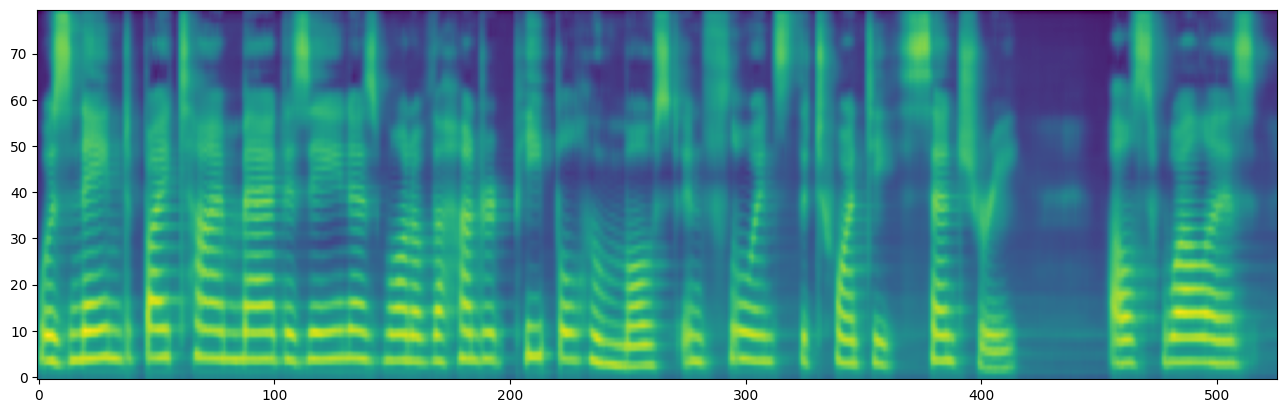

In [108]:

bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH
processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)

text = transcriptions

with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, _, _ = tacotron2.infer(processed, lengths)


_ = plt.imshow(spec[0].cpu().detach(), origin="lower", aspect="auto")

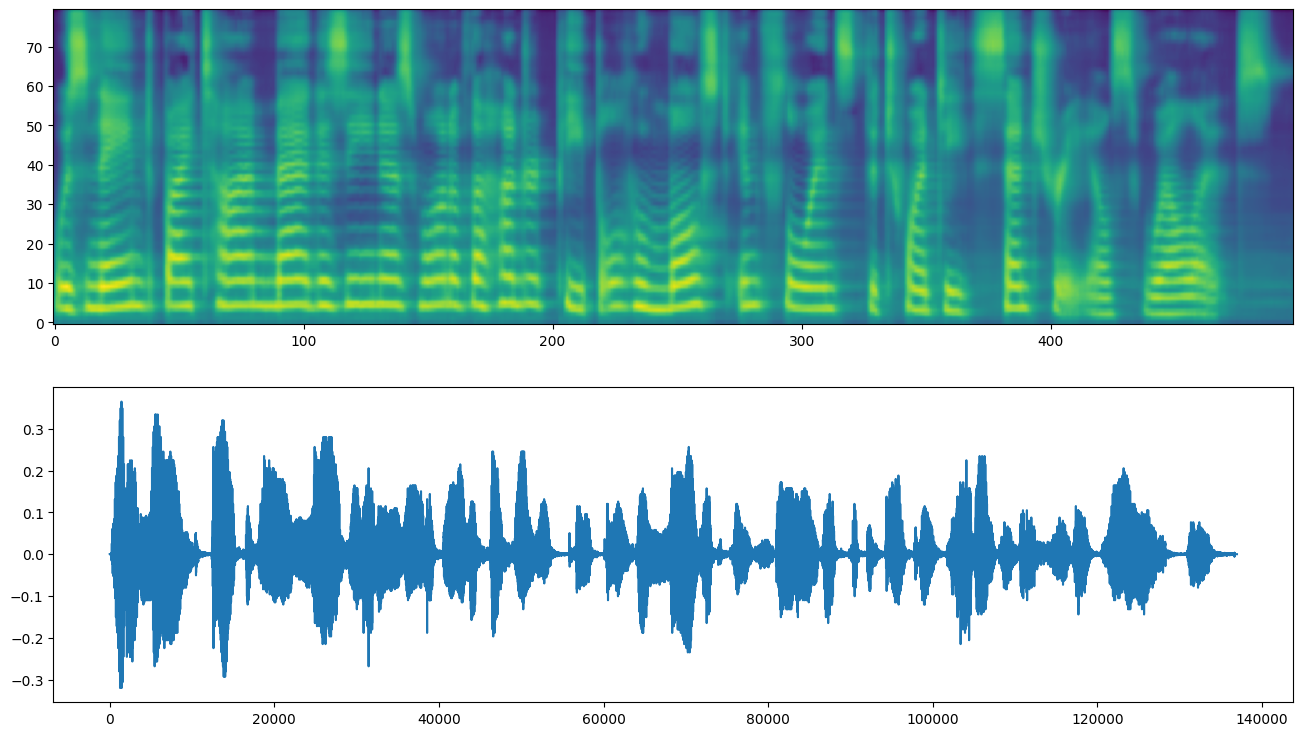

In [109]:


bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)
vocoder = bundle.get_vocoder().to(device)

text = transcriptions

with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
    waveforms, lengths = vocoder(spec, spec_lengths)

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(16, 9))
ax1.imshow(spec[0].cpu().detach(), origin="lower", aspect="auto")
ax2.plot(waveforms[0].cpu().detach())

IPython.display.Audio(waveforms[0:1].cpu(), rate=vocoder.sample_rate)
